In [38]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [39]:
#Load data set
claimants=pd.read_csv("D:/DATA SCIENCE/Data sets/day15/claimants.csv",)
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [40]:
claimants.drop(['CASENUM'],inplace=True,axis=1)  #drop column
claimants.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [41]:
claimants.shape

(1340, 6)

In [42]:
claimants=claimants.dropna()
claimants.shape

(1096, 6)

In [43]:
#dividing our data into input and output variables
X=claimants.iloc[:,1:]
Y=claimants.iloc[:,0]

In [44]:
#logisticRegression and fit model
classifier=LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [45]:
#predict for x dataset
y_pred=classifier.predict(X)

In [46]:
y_pred_df=pd.DataFrame({'actual':Y,'predicted_prob':y_pred})

In [47]:
y_pred_df

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [48]:
#cofusion matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [49]:
#find accuracy
((381+395)/(381+197+123+395))*100

70.8029197080292

In [50]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [51]:
#ROC Cure
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
prob=classifier.predict_proba(X)[:,1]
fpr,tpr,threshold=roc_curve(Y,prob)

In [52]:
auc=roc_auc_score(Y,y_pred)
auc

0.7108589063606365

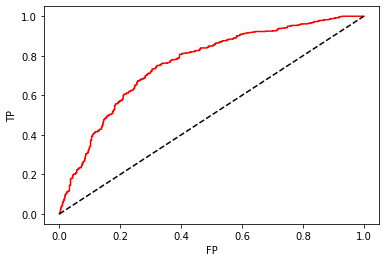

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red',label='logit model (area=%0.2f)'%auc)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("FP");plt.ylabel("TP")
plt.show()